


Training Age Model
Epoch 1/100


565/565 [==============================] - ETA: 0s - loss: 9.1021 - mae: 9.1021
Epoch 1: val_loss improved from inf to 13.55556, saving model to age_model_weights.h5
565/565 [==============================] - 727s 1s/step - loss: 9.1021 - mae: 9.1021 - val_loss: 13.5556 - val_mae: 13.5556
Epoch 2/100
565/565 [==============================] - ETA: 0s - loss: 5.8263 - mae: 5.8263
Epoch 2: val_loss improved from 13.55556 to 6.72425, saving model to age_model_weights.h5
565/565 [==============================] - 708s 1s/step - loss: 5.8263 - mae: 5.8263 - val_loss: 6.7243 - val_mae: 6.7243
Epoch 3/100
565/565 [==============================] - ETA: 0s - loss: 4.9837 - mae: 4.9837
Epoch 3: val_loss improved from 6.72425 to 5.97589, saving model to age_model_weights.h5
565/565 [==============================] - 709s 1s/step - loss: 4.9837 - mae: 4.9837 - val_loss: 5.9759 - val_mae: 5.9759
Epoch 4/100
565/565 [==============================] - ETA: 0s - lo

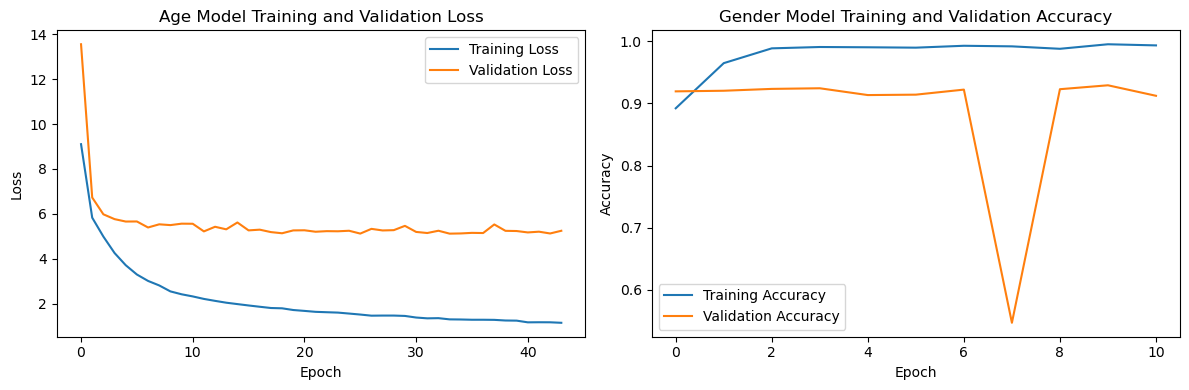

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split

# Set the path to the dataset
data_folder = "C:/yas_tahmini/UTKFaceee"

# Load and process the data
files = os.listdir(data_folder)
ages = []
genders = []
images = []

for file in files:
    parts = file.split('_')
    if len(parts) < 3 or not parts[0].isdigit() or not parts[1].isdigit():
        continue

    age, gender = map(int, parts[:2])
    full_path = os.path.join(data_folder, file)
    image = cv2.imread(full_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))
    images.append(image)
    ages.append(age)
    genders.append(gender)

images_np = np.array(images) / 255
ages_np = np.array(ages)
genders_np = np.array(genders)

X_train, X_test, Y_age_train, Y_age_test, Y_gender_train, Y_gender_test = train_test_split(images_np, ages_np, genders_np, test_size=0.25)

# Load the pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False)

# Age Model
x_age = GlobalAveragePooling2D()(base_model.output)
x_age = Dense(64, activation='relu')(x_age)
output_age = Dense(1, activation='relu', name='age_output')(x_age)
age_model = Model(inputs=base_model.input, outputs=output_age)
age_model.compile(optimizer=Adam(learning_rate=0.00005), loss='mae', metrics=['mae'])

# Gender Model
x_gender = GlobalAveragePooling2D()(base_model.output)
x_gender = Dense(64, activation='relu')(x_gender)
output_gender = Dense(1, activation='sigmoid', name='gender_output')(x_gender)
gender_model = Model(inputs=base_model.input, outputs=output_gender)
gender_model.compile(optimizer=Adam(learning_rate=0.00005), loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks for Age Model
age_saver = ModelCheckpoint('age_model_weights.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True, mode='min')
age_early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')

# Callbacks for Gender Model
gender_saver = ModelCheckpoint('gender_model_weights.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True, mode='min')
gender_early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')

# Train the Age Model
print("Training Age Model")
history_age = age_model.fit(
    X_train, Y_age_train,
    batch_size=32,
    validation_data=(X_test, Y_age_test),
    epochs=100,
    callbacks=[age_saver, age_early_stopping]
)

# Print the epoch number where Age Model training stopped
print(f"Age Model training stopped at epoch: {len(history_age.history['loss'])}")

# Train the Gender Model
print("Training Gender Model")
history_gender = gender_model.fit(
    X_train, Y_gender_train,
    batch_size=32,
    validation_data=(X_test, Y_gender_test),
    epochs=50,
    callbacks=[gender_saver, gender_early_stopping]
)

# Print the epoch number where Gender Model training stopped
print(f"Gender Model training stopped at epoch: {len(history_gender.history['loss'])}")

# Plotting the training and validation loss for Age Model
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_age.history['loss'], label='Training Loss')
plt.plot(history_age.history['val_loss'], label='Validation Loss')
plt.title('Age Model Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting the training and validation accuracy for Gender Model
plt.subplot(1, 2, 2)
plt.plot(history_gender.history['accuracy'], label='Training Accuracy')
plt.plot(history_gender.history['val_accuracy'], label='Validation Accuracy')
plt.title('Gender Model Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()





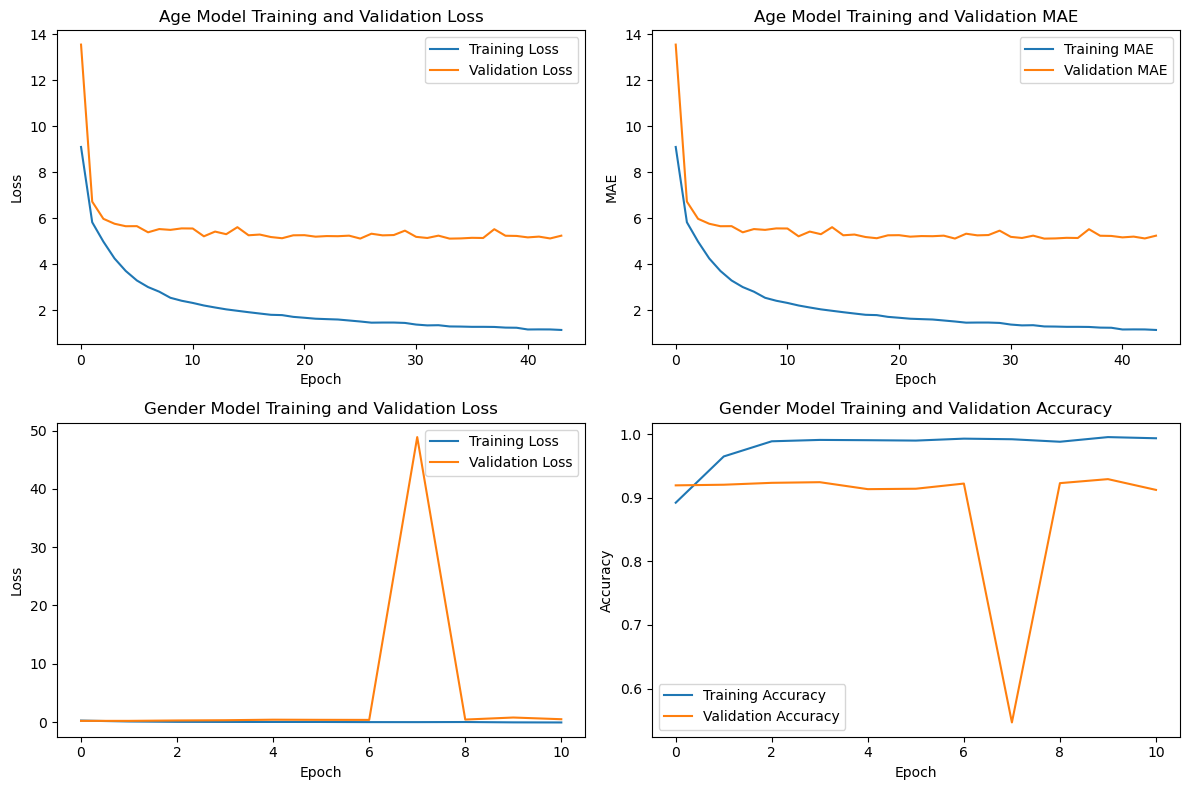

In [2]:
# Eğitim ve doğrulama MAE grafikleri için Age Model
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history_age.history['loss'], label='Training Loss')
plt.plot(history_age.history['val_loss'], label='Validation Loss')
plt.title('Age Model Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(history_age.history['mae'], label='Training MAE')
plt.plot(history_age.history['val_mae'], label='Validation MAE')
plt.title('Age Model Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

# Eğitim ve doğrulama kaybı grafikleri için Gender Model
plt.subplot(2, 2, 3)
plt.plot(history_gender.history['loss'], label='Training Loss')
plt.plot(history_gender.history['val_loss'], label='Validation Loss')
plt.title('Gender Model Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(history_gender.history['accuracy'], label='Training Accuracy')
plt.plot(history_gender.history['val_accuracy'], label='Validation Accuracy')
plt.title('Gender Model Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

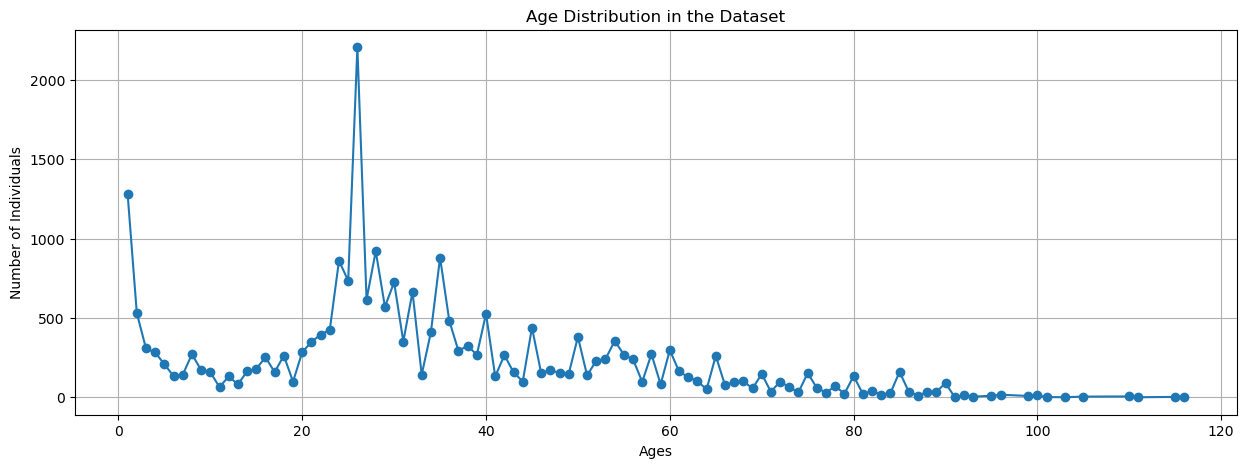

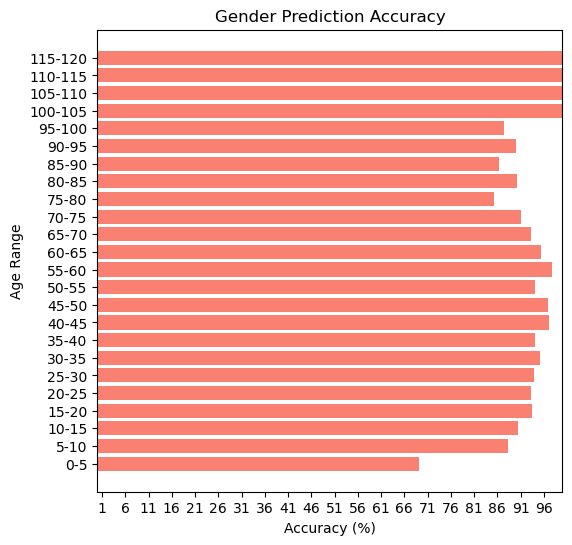

189/189 [==============================] - 98s 516ms/step
Gender Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      3173
           1       0.91      0.92      0.92      2854

    accuracy                           0.92      6027
   macro avg       0.92      0.92      0.92      6027
weighted avg       0.92      0.92      0.92      6027

189/189 [==============================] - 97s 515ms/step
Mean Absolute Error (MAE) for Age Prediction: 5.11447659692144


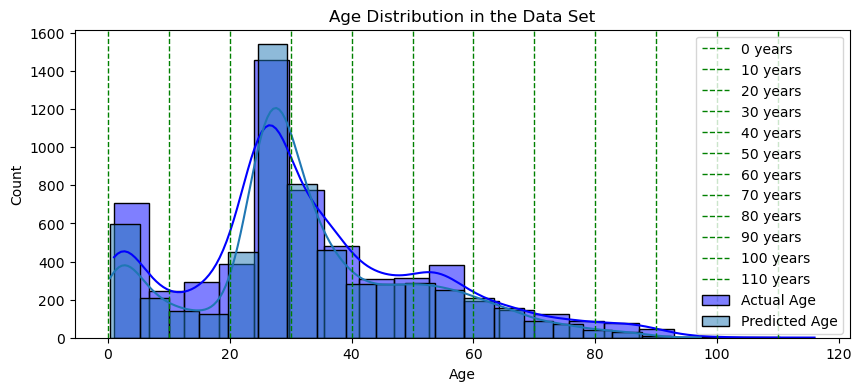

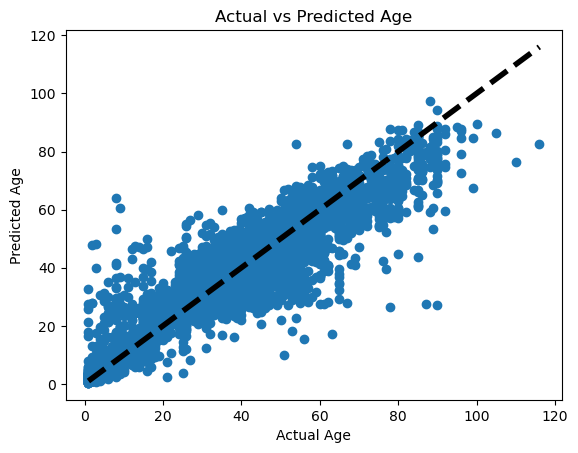

In [37]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, mean_absolute_error
import seaborn as sns

# Her yaş için kişi sayısını hesaplama
age_counts = {}
for age in ages_np:
    if age in age_counts:
        age_counts[age] += 1
    else:
        age_counts[age] = 1

# Yaşlara göre dağılımı sıralı bir şekilde almak
sorted_ages = sorted(age_counts.keys())
counts = [age_counts[age] for age in sorted_ages]

# Yaş Dağılım Grafiği
plt.figure(figsize=(15, 5))
plt.plot(sorted_ages, counts, marker='o')
plt.xlabel('Ages')
plt.ylabel('Number of Individuals')
plt.title('Age Distribution in the Dataset')
plt.grid(True)
plt.show()

# Yaş ve Cinsiyet Doğruluk Değerlerini Çiz (Sadece Cinsiyet İçin)
plt.figure(figsize=(6, 6))
gender_ranges = list(gender_accuracies.keys())
accuracies_gender = list(gender_accuracies.values())
x_ticks = np.arange(1, 121, 5)
plt.barh(gender_ranges, accuracies_gender, color='salmon')
plt.xticks(x_ticks)
plt.xlim(0, 100)
plt.xlabel('Accuracy (%)')
plt.ylabel('Age Range')
plt.title('Gender Prediction Accuracy')
plt.show()

# Cinsiyet Modeli İçin Sınıflandırma Raporu
gender_model.load_weights('C:/Users/kasim.sahin/gender_model_weights.h5')
y_pred_gender = gender_model.predict(X_test)
y_pred_gender = (y_pred_gender > 0.5).astype(int)
print("Gender Classification Report:")
print(classification_report(Y_gender_test, y_pred_gender))

# Yaş Tahmini İçin MAE
age_model.load_weights('C:/Users/kasim.sahin/age_model_weights.h5')
y_pred_age = age_model.predict(X_test)
mae = mean_absolute_error(Y_age_test, y_pred_age)
print("Mean Absolute Error (MAE) for Age Prediction:", mae)

# Veri Setindeki Yaş Dağılımı
plt.figure(figsize=(10, 4))
sns.histplot(Y_age_test, bins=20, color='blue', label='Actual Age', kde=True)
sns.histplot(y_pred_age, bins=20, color='green', label='Predicted Age', kde=True)
for age in range(0, 120, 10):
    plt.axvline(x=age, color='green', linestyle='--', linewidth=1, label=f'{age} years')
plt.title('Age Distribution in the Data Set')
plt.xlabel('Age')
plt.legend(loc='upper right')
plt.show()

# Yaş Tahminlerini Karşılaştırma Grafiği
fig, ax = plt.subplots()
ax.scatter(Y_age_test, y_pred_age.flatten())  # Adjusted with y_pred_age.flatten()
ax.plot([Y_age_test.min(), Y_age_test.max()], [Y_age_test.min(), Y_age_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.title('Actual vs Predicted Age')
plt.show()


189/189 [==============================] - 99s 524ms/step
Accuracy within 3 years: 46.52397544383607%


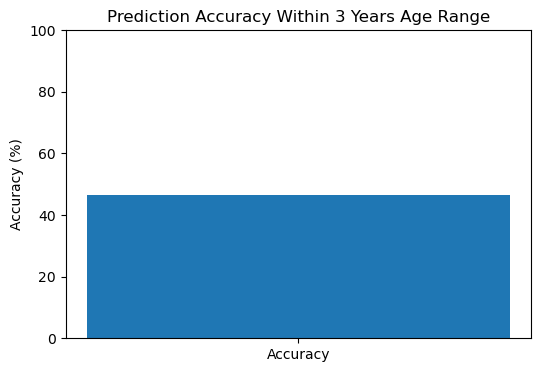

In [35]:
def calculate_accuracy_within_3_years(y_true, y_pred):
    correct = 0
    total = len(y_true)

    for actual_age, predicted_age in zip(y_true, y_pred):
        lower_bound = predicted_age - 3
        upper_bound = predicted_age + 3
        if lower_bound <= actual_age <= upper_bound:
            correct += 1

    accuracy = (correct / total) * 100
    return accuracy

# Age Model tahminleri
predicted_ages = age_model.predict(X_test).flatten()

# Tahminlerin doğruluğunu hesapla
accuracy_within_3_years = calculate_accuracy_within_3_years(Y_age_test, predicted_ages)

# Doğruluk oranını bas
print(f"Accuracy within 3 years: {accuracy_within_3_years}%")

# Doğruluk oranını gösteren grafik
plt.figure(figsize=(6, 4))
plt.bar(['Accuracy'], [accuracy_within_3_years])
plt.ylabel('Accuracy (%)')
plt.title('Prediction Accuracy Within 3 Years Age Range')
plt.ylim(0, 100)
plt.show()




189/189 [==============================] - 101s 535ms/step
Age group 1-5: 90.20771513353115 accuracy
Age group 6-10: 55.15695067264574 accuracy
Age group 11-15: 40.23668639053255 accuracy
Age group 16-20: 26.666666666666668 accuracy
Age group 21-25: 53.85714285714286 accuracy
Age group 26-30: 62.55077173030057 accuracy
Age group 31-35: 35.738255033557046 accuracy
Age group 36-40: 25.82781456953642 accuracy
Age group 41-45: 25.589225589225588 accuracy
Age group 46-50: 29.249011857707508 accuracy
Age group 51-55: 33.53846153846154 accuracy
Age group 56-60: 29.23728813559322 accuracy
Age group 61-65: 26.666666666666668 accuracy
Age group 66-70: 27.906976744186046 accuracy
Age group 71-75: 17.073170731707318 accuracy
Age group 76-80: 13.750000000000002 accuracy
Age group 81-85: 28.767123287671232 accuracy
Age group 86-90: 3.7735849056603774 accuracy
Age group 91-95: 0.0 accuracy
Age group 96-100: 0.0 accuracy
Age group 101-105: 0.0 accuracy
Age group 106-110: 0.0 accuracy
Age group 111-115

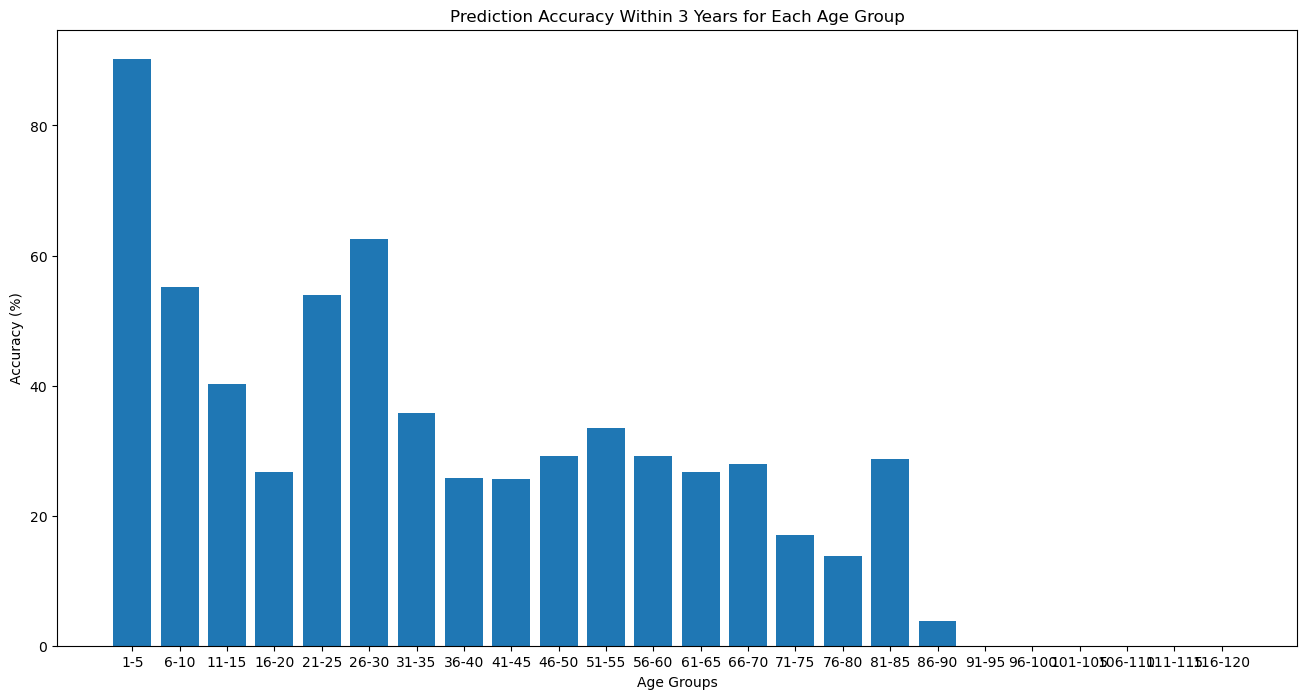

In [22]:
def calculate_accuracy_within_3_years_per_age_group(y_true, y_pred, age_groups):
    # Her yaş grubu için doğruluk oranlarını saklayacak sözlük
    accuracy_per_group = {group: {'correct': 0, 'total': 0} for group in age_groups}

    for actual_age, predicted_age in zip(y_true, y_pred):
        # Hangi yaş grubuna ait olduğunu bul
        age_group = min([group for group in age_groups if actual_age in group])

        # 3 yıllık aralıkta doğru mu kontrol et
        lower_bound = predicted_age - 3
        upper_bound = predicted_age + 3
        if lower_bound <= actual_age <= upper_bound:
            accuracy_per_group[age_group]['correct'] += 1
        accuracy_per_group[age_group]['total'] += 1

    # Her yaş grubu için yüzde doğruluk hesapla, 0'a bölme hatasını önle
    accuracy_percentages = {}
    for group, values in accuracy_per_group.items():
        if values['total'] > 0:
            accuracy = (values['correct'] / values['total']) * 100
        else:
            accuracy = 'N/A'  # Veri yok
        accuracy_percentages[group] = accuracy

    return accuracy_percentages

# Yaş gruplarını tanımla (0-120 arası 5'er yıllık dilimler)
age_groups = [range(i, i + 5) for i in range(1, 121, 5)]

# Age Model tahminleri
predicted_ages = age_model.predict(X_test).flatten()

# Her yaş grubu için doğruluk oranını hesapla
accuracy_per_age_group = calculate_accuracy_within_3_years_per_age_group(Y_age_test, predicted_ages, age_groups)

# Sonuçları bas
for age_group, accuracy in accuracy_per_age_group.items():
    print(f"Age group {min(age_group)}-{max(age_group)}: {accuracy} accuracy")

# Sonuçları grafikte göster (N/A durumları hariç tut)
plt.figure(figsize=(16, 8))
plt.bar(range(len(accuracy_per_age_group)), [acc if isinstance(acc, float) else 0 for acc in accuracy_per_age_group.values()], align='center')
plt.xticks(range(len(accuracy_per_age_group)), [f"{min(group)}-{max(group)}" for group in age_groups])
plt.xlabel('Age Groups')
plt.ylabel('Accuracy (%)')
plt.title('Prediction Accuracy Within 3 Years for Each Age Group')
plt.show()


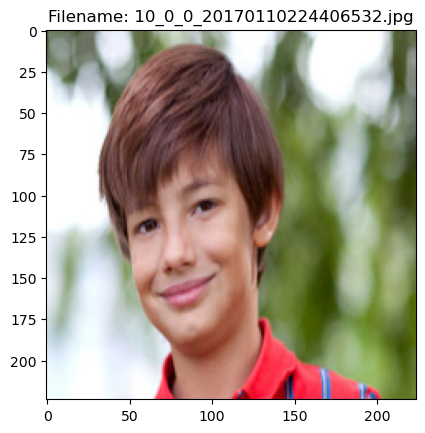

1/1 [==============================] - 0s 146ms/step
Actual Age: 10, Actual Gender: Male
Predicted Age: 10, Predicted Gender: Male


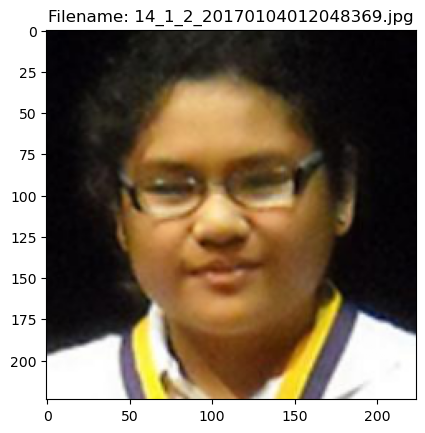

1/1 [==============================] - 0s 126ms/step
Actual Age: 14, Actual Gender: Female
Predicted Age: 14, Predicted Gender: Female


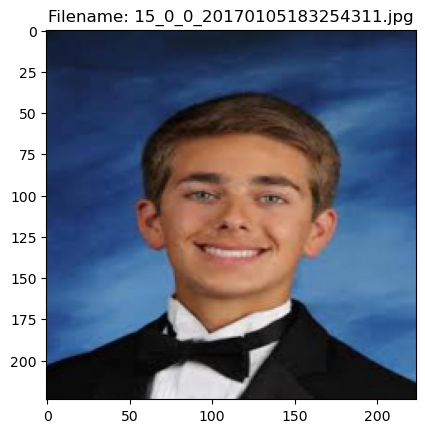

1/1 [==============================] - 0s 131ms/step
Actual Age: 15, Actual Gender: Male
Predicted Age: 24, Predicted Gender: Male


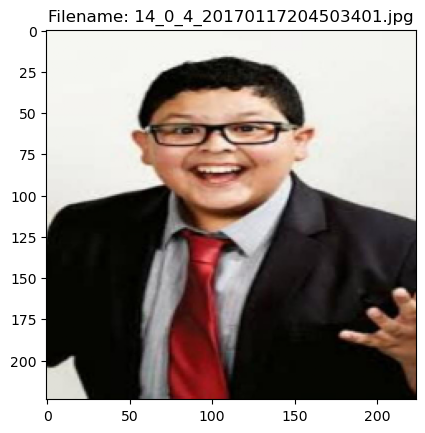

1/1 [==============================] - 0s 153ms/step
Actual Age: 14, Actual Gender: Male
Predicted Age: 16, Predicted Gender: Male


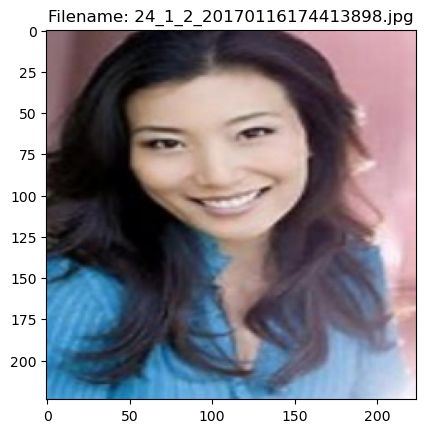

1/1 [==============================] - 0s 145ms/step
Actual Age: 24, Actual Gender: Female
Predicted Age: 23, Predicted Gender: Female


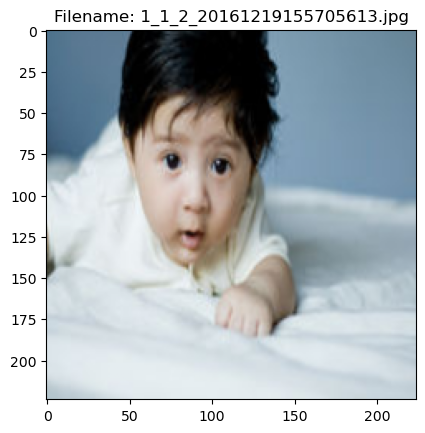

1/1 [==============================] - 0s 159ms/step
Actual Age: 1, Actual Gender: Female
Predicted Age: 1, Predicted Gender: Female


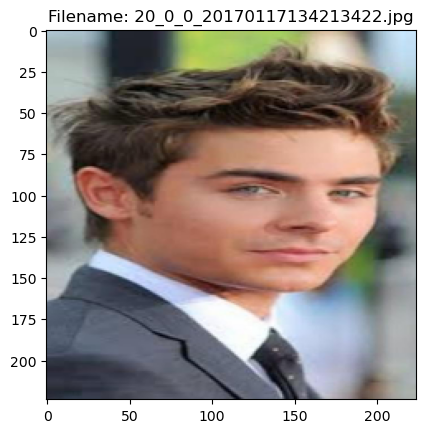

1/1 [==============================] - 0s 176ms/step
Actual Age: 20, Actual Gender: Male
Predicted Age: 22, Predicted Gender: Male


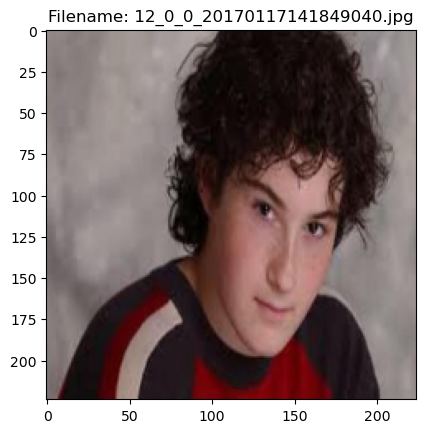

1/1 [==============================] - 0s 152ms/step
Actual Age: 12, Actual Gender: Male
Predicted Age: 14, Predicted Gender: Male


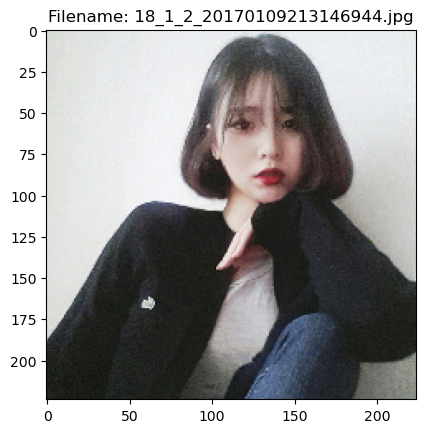

1/1 [==============================] - 0s 132ms/step
Actual Age: 18, Actual Gender: Female
Predicted Age: 13, Predicted Gender: Female


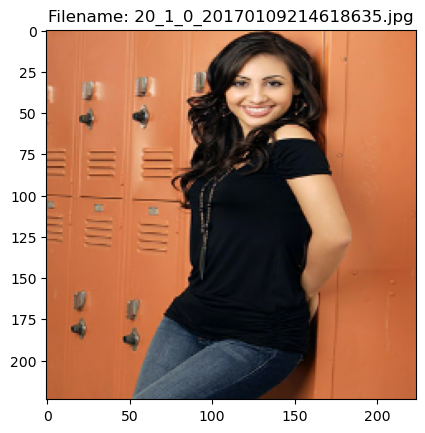

1/1 [==============================] - 0s 142ms/step
Actual Age: 20, Actual Gender: Female
Predicted Age: 19, Predicted Gender: Female


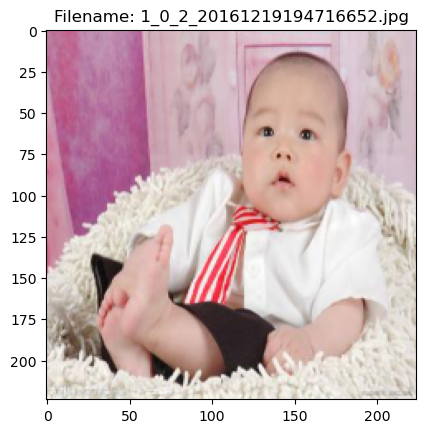

1/1 [==============================] - 0s 139ms/step
Actual Age: 1, Actual Gender: Male
Predicted Age: 1, Predicted Gender: Female


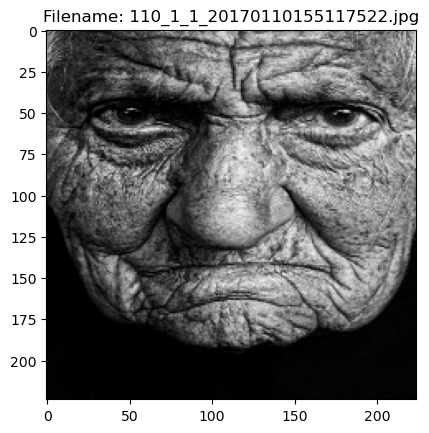

1/1 [==============================] - 0s 134ms/step
Actual Age: 110, Actual Gender: Female
Predicted Age: 117, Predicted Gender: Female


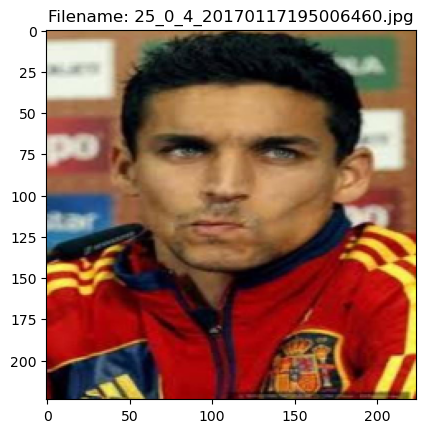

1/1 [==============================] - 0s 149ms/step
Actual Age: 25, Actual Gender: Male
Predicted Age: 24, Predicted Gender: Male


In [49]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split

# Set the path to the dataset
data_folder = "C:/yas_tahmini/UTKFaceee"

# Load and process the data
files = os.listdir(data_folder)
ages = []
genders = []
images = []

for file in files:
    parts = file.split('_')
    if len(parts) < 3 or not parts[0].isdigit() or not parts[1].isdigit():
        continue

    age, gender = map(int, parts[:2])
    ages.append(age)
    genders.append(gender)

ages_np = np.array(ages, dtype=np.float32)
genders_np = np.array(genders, dtype=np.float32)

# Function to process and return a single image
def process_image(file):
    full_path = os.path.join(data_folder, file)
    image = cv2.imread(full_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))
    image = image.astype(np.float32) / 255
    return image

# Test Specific Images Function
def test_specific_images(indices, age_model, gender_model):
    for index in indices:
        if 0 <= index < len(files):
            file = files[index]
            actual_age, actual_gender = ages_np[index], genders_np[index]
            actual_age = int(actual_age)  # Yaşı tam sayıya dönüştür
            actual_gender_str = 'Female' if actual_gender == 1 else 'Male'

            image = process_image(file)
            plt.imshow(image)
            plt.title(f"Filename: {file}")
            plt.show()

            age_pred = age_model.predict(np.array([image]))
            gender_pred = gender_model.predict(np.array([image]))

            predicted_age = int(np.round(age_pred[0]))
            predicted_gender = 'Female' if int(np.round(gender_pred[0])) == 1 else 'Male'

            print(f"Actual Age: {actual_age}, Actual Gender: {actual_gender_str}")
            print(f"Predicted Age: {predicted_age}, Predicted Gender: {predicted_gender}")
        else:
            print(f"Index {index} is out of range. Valid range is 0 to {len(files) - 1}")


# Load your models (age_model and gender_model)
# Make sure to load or define your models here

# Test the models with specific indices
specific_indices = [52, 615, 650, 549, 4961, 2537, 2902, 278, 1451, 3001, 1904, 181, 5472]
test_specific_images(specific_indices, age_model, gender_model)


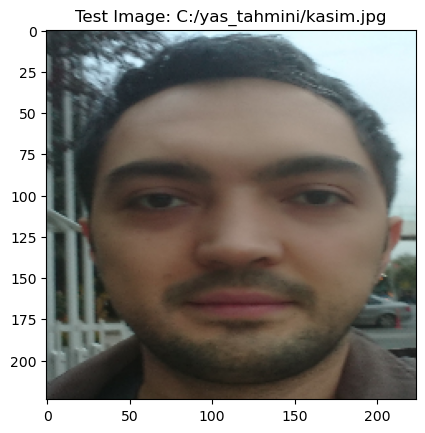

1/1 [==============================] - 1s 1s/step
Predicted Age: 27, Predicted Gender: Male


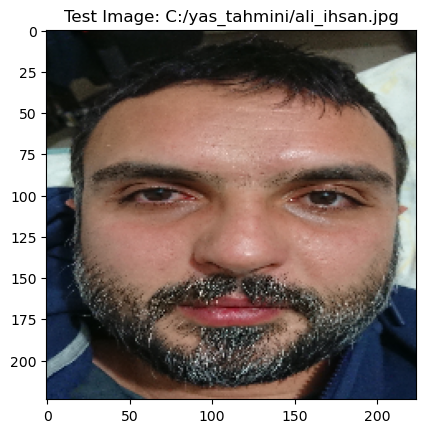

1/1 [==============================] - 0s 172ms/step
Predicted Age: 48, Predicted Gender: Male


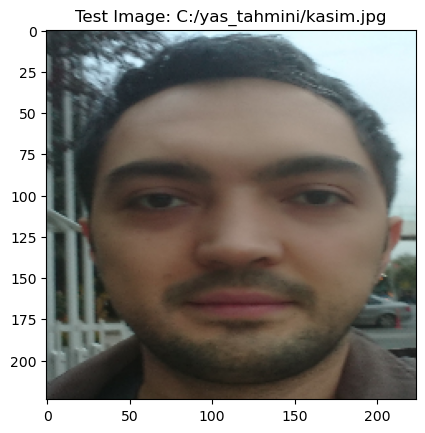

1/1 [==============================] - 0s 194ms/step
Predicted Age: 27, Predicted Gender: Male


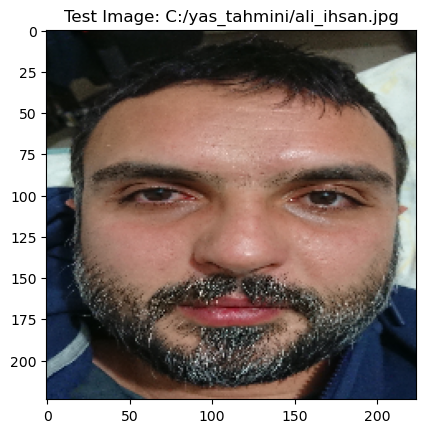

1/1 [==============================] - 0s 159ms/step
Predicted Age: 48, Predicted Gender: Male


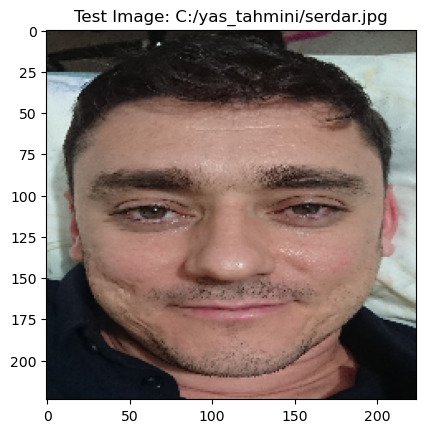

1/1 [==============================] - 0s 143ms/step
Predicted Age: 38, Predicted Gender: Male


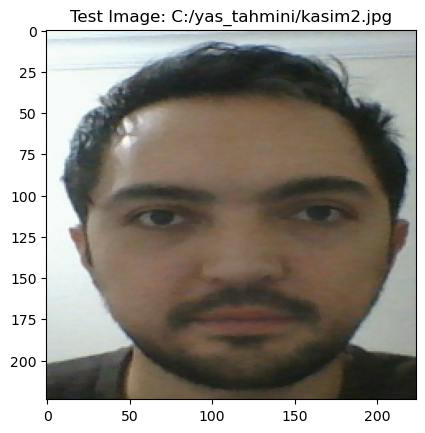

1/1 [==============================] - 0s 165ms/step
Predicted Age: 30, Predicted Gender: Male


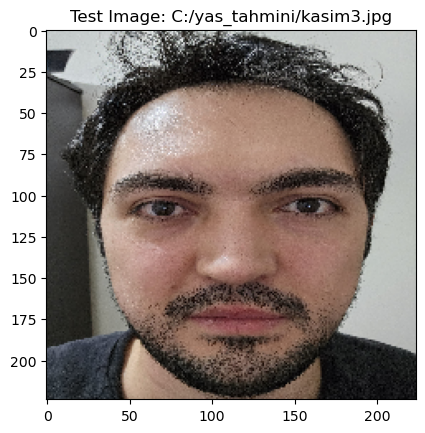

1/1 [==============================] - 0s 166ms/step
Predicted Age: 34, Predicted Gender: Male


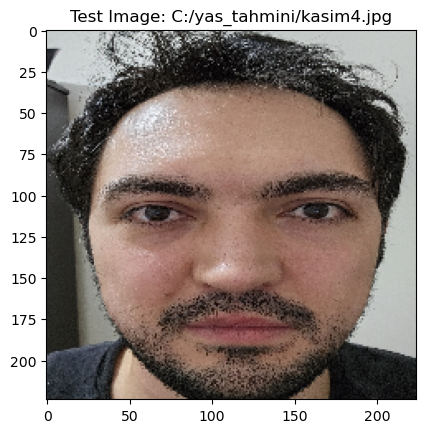

1/1 [==============================] - 0s 186ms/step
Predicted Age: 44, Predicted Gender: Male


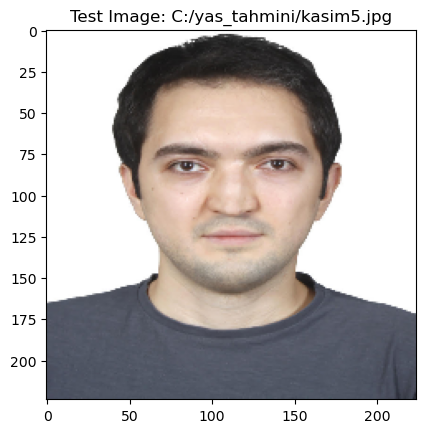

1/1 [==============================] - 0s 160ms/step
Predicted Age: 28, Predicted Gender: Male


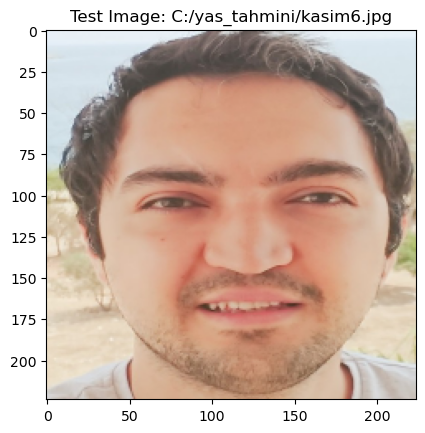

1/1 [==============================] - 0s 201ms/step
Predicted Age: 24, Predicted Gender: Male


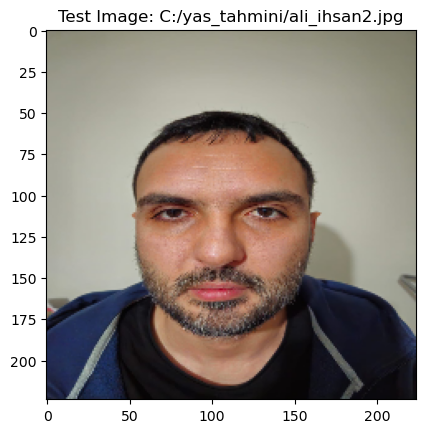

1/1 [==============================] - 0s 189ms/step
Predicted Age: 49, Predicted Gender: Male


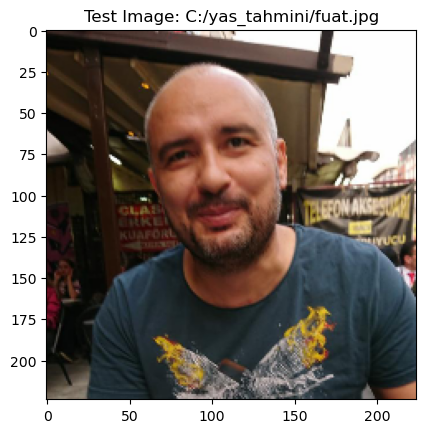

1/1 [==============================] - 0s 171ms/step
Predicted Age: 40, Predicted Gender: Male


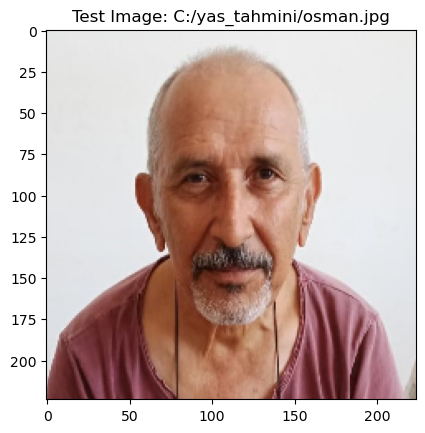

1/1 [==============================] - 0s 180ms/step
Predicted Age: 74, Predicted Gender: Male


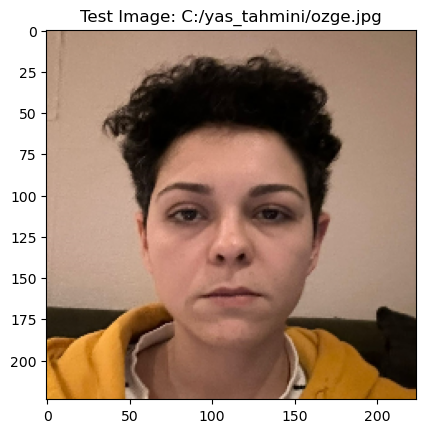

1/1 [==============================] - 0s 162ms/step
Predicted Age: 31, Predicted Gender: Female


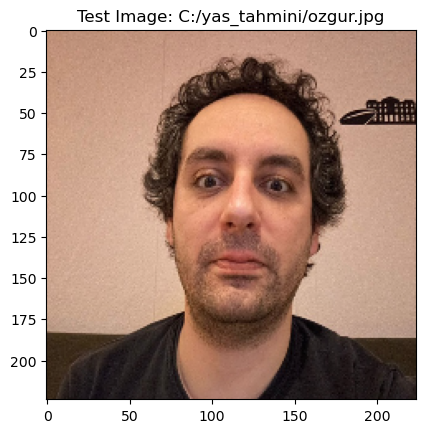

1/1 [==============================] - 0s 141ms/step
Predicted Age: 38, Predicted Gender: Male


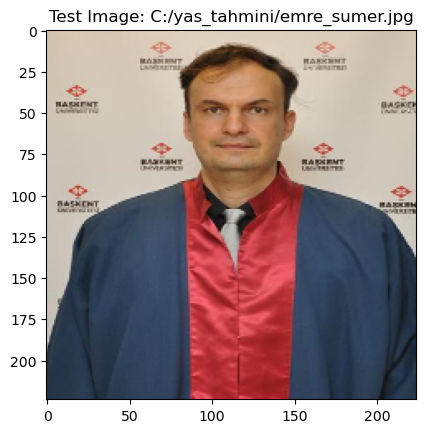

1/1 [==============================] - 0s 160ms/step
Predicted Age: 53, Predicted Gender: Male


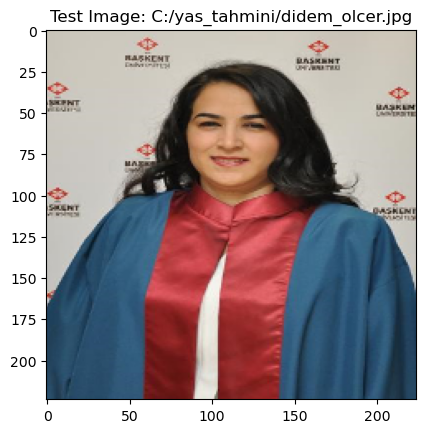

1/1 [==============================] - 0s 164ms/step
Predicted Age: 33, Predicted Gender: Female


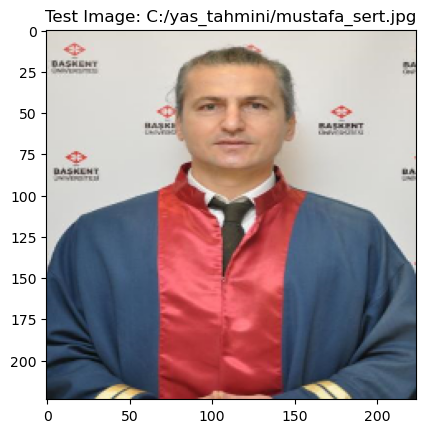

1/1 [==============================] - 0s 143ms/step
Predicted Age: 51, Predicted Gender: Male


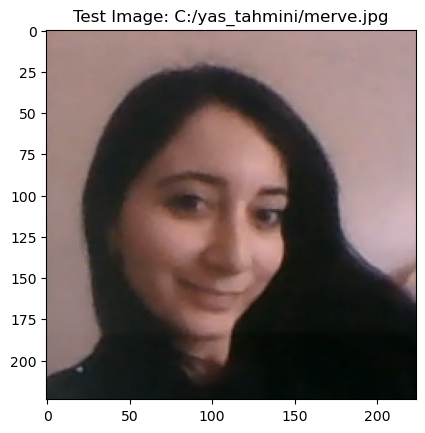

1/1 [==============================] - 0s 166ms/step
Predicted Age: 27, Predicted Gender: Female


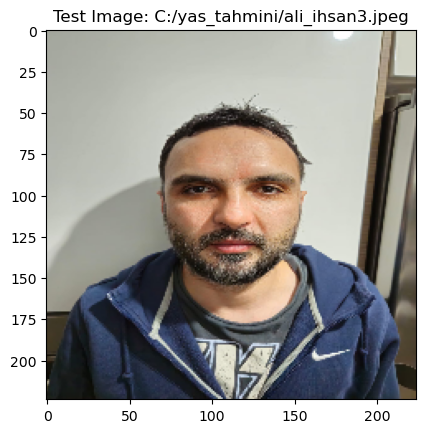

1/1 [==============================] - 0s 158ms/step
Predicted Age: 54, Predicted Gender: Male


In [16]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense

# Age ve Gender Model'lerini yeniden oluşturun ve ağırlıkları yükleyin

# Age Model
base_model_age = ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))
x_age = GlobalAveragePooling2D()(base_model_age.output)
x_age = Dense(64, activation='relu')(x_age)
output_age = Dense(1, activation='relu', name='age_output')(x_age)
age_model = Model(inputs=base_model_age.input, outputs=output_age)
age_model.load_weights('age_model_weights.h5')  # Yolun doğru olduğundan emin olun

# Gender Model
base_model_gender = ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))
x_gender = GlobalAveragePooling2D()(base_model_gender.output)
x_gender = Dense(64, activation='relu')(x_gender)
output_gender = Dense(1, activation='sigmoid', name='gender_output')(x_gender)
gender_model = Model(inputs=base_model_gender.input, outputs=output_gender)
gender_model.load_weights('gender_model_weights.h5')  # Yolun doğru olduğundan emin olun

# Resim tahmini fonksiyonunu tanımla
def external_test_image(image_path, age_model, gender_model):
    # Resmi yükle ve boyutlandır
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))

    # Resmi göster
    plt.imshow(image)
    plt.title(f"Test Image: {image_path}")
    plt.show()

    # Normalize et ve tahmin yap
    image = np.array(image) / 255.0
    age_pred = age_model.predict(np.array([image]))
    gender_pred = gender_model.predict(np.array([image]))

    # Tahminleri al ve yazdır
    predicted_age = int(np.round(age_pred[0][0]))
    predicted_gender = 'Female' if int(np.round(gender_pred[0][0])) == 1 else 'Male'

    print(f"Predicted Age: {predicted_age}, Predicted Gender: {predicted_gender}")

# Test resimleri
test_images = [
    'C:/yas_tahmini/kasim.jpg',
    'C:/yas_tahmini/ali_ihsan.jpg',
    'C:/yas_tahmini/kasim.jpg',
    'C:/yas_tahmini/ali_ihsan.jpg',
    'C:/yas_tahmini/serdar.jpg',
    'C:/yas_tahmini/kasim2.jpg',
    'C:/yas_tahmini/kasim3.jpg',
    'C:/yas_tahmini/kasim4.jpg',
    'C:/yas_tahmini/kasim5.jpg',
    'C:/yas_tahmini/kasim6.jpg',
    'C:/yas_tahmini/ali_ihsan2.jpg',
    'C:/yas_tahmini/fuat.jpg',
    'C:/yas_tahmini/osman.jpg',
    'C:/yas_tahmini/ozge.jpg',
    'C:/yas_tahmini/ozgur.jpg',
    'C:/yas_tahmini/emre_sumer.jpg',
    'C:/yas_tahmini/didem_olcer.jpg',
    'C:/yas_tahmini/mustafa_sert.jpg',
    'C:/yas_tahmini/merve.jpg',
    'C:/yas_tahmini/ali_ihsan3.jpeg',
]

# Her resim için tahmin yap
for img_path in test_images:
    external_test_image(img_path, age_model, gender_model)

